In [12]:
#Importações

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Leitura de dados

orders = pd.read_csv("../data/olist_orders_dataset.csv", parse_dates=[
    "order_purchase_timestamp",
    "order_delivered_customer_date",
    "order_estimated_delivery_date"
])

customers = pd.read_csv("../data/olist_customers_dataset.csv")
reviews = pd.read_csv("../data/olist_order_reviews_dataset.csv")


In [23]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [3]:
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](3), object(5)
memory usage: 6.1+ MB


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [4]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [5]:
#Criação de colunas

#Tempo de entrega (Em dias)
orders['delivery_days'] = (
    orders["order_delivered_customer_date"] - 
    orders["order_purchase_timestamp"]
).dt.days

# atrasp em dias (Positivo = atraso)
orders["delay_days"] = (
    orders["order_delivered_customer_date"] -
    orders["order_estimated_delivery_date"]
).dt.days

# Identificador de atraso

orders["is_late"] = orders["delay_days"] > 0

In [6]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_days,delay_days,is_late
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,-8.0,False
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,-6.0,False
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,-18.0,False
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,-13.0,False
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,-10.0,False


In [7]:
#junção de review e clientes

df = orders.merge(customers, on="customer_id", how="left")
df = df.merge(reviews[["order_id", "review_score"]], on="order_id", how ="left")

In [8]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99992 entries, 0 to 99991
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99992 non-null  object        
 1   customer_id                    99992 non-null  object        
 2   order_status                   99992 non-null  object        
 3   order_purchase_timestamp       99992 non-null  datetime64[ns]
 4   order_approved_at              99831 non-null  object        
 5   order_delivered_carrier_date   98199 non-null  object        
 6   order_delivered_customer_date  97005 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99992 non-null  datetime64[ns]
 8   delivery_days                  97005 non-null  float64       
 9   delay_days                     97005 non-null  float64       
 10  is_late                        99992 non-null  bool          
 11  customer_unique

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_days,delay_days,is_late,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,-8.0,False,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,4.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,-6.0,False,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,4.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,-18.0,False,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,5.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,-13.0,False,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,5.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,-10.0,False,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,5.0


In [9]:

df.isna().sum()


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 161
order_delivered_carrier_date     1793
order_delivered_customer_date    2987
order_estimated_delivery_date       0
delivery_days                    2987
delay_days                       2987
is_late                             0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
review_score                      768
dtype: int64

## Respondendo Perguntas ##

1.Quantos pedidos foram realizados ao longo do tempo?

2.Quais estados concentram mais pedidos?

3.Qual é o tempo médio de entrega?

4.Onde ocorrem mais atrasos?

5.Existe relação entre atraso e avaliação do cliente?


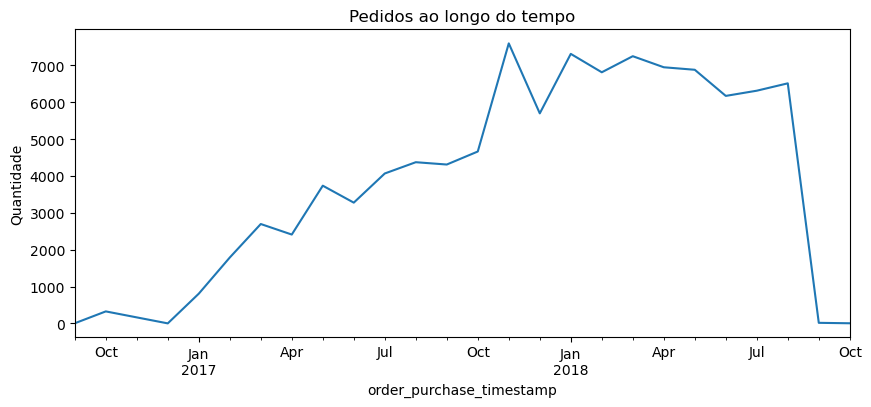

In [13]:
#Quantos pedidos foram realizados ao longo do tempo?
#Agrupando periodos

orders_time = df.groupby(
    df["order_purchase_timestamp"].dt.to_period("M")
).size()


orders_time.plot(kind="line", figsize=(10,4))
plt.title("Pedidos ao longo do tempo")
plt.ylabel("Quantidade")
plt.show()

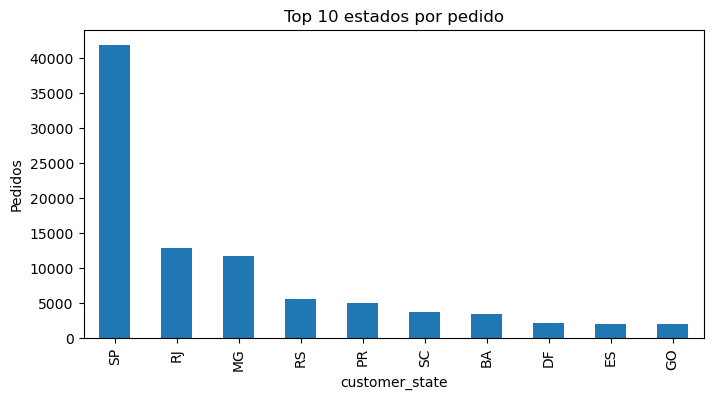

In [15]:
## Quais estados concentram mais pedidos?

state_order = df["customer_state"].value_counts().head(10)

state_order.plot(kind= "bar", figsize=(8,4))
plt.title("Top 10 estados por pedido")
plt.ylabel("Pedidos")
plt.show()

In [17]:
## Tempo medio de entrega

df["delivery_days"].mean()

np.float64(12.100015463120458)

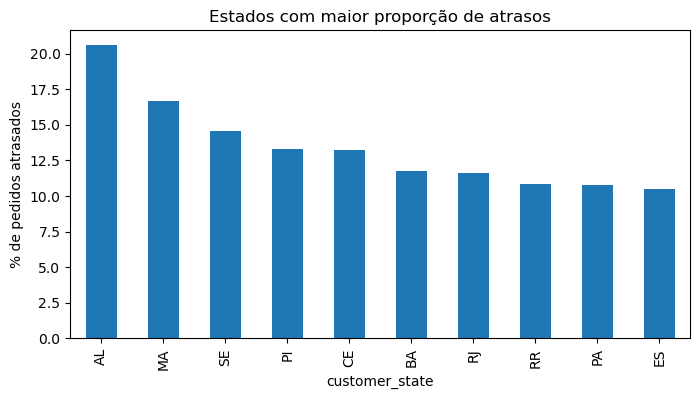

In [20]:
## Onde ocorrem mais atrasos?

late_by_state = df.groupby("customer_state")["is_late"].mean().sort_values(ascending=False).head(10)*100

late_by_state.plot(kind="bar", figsize=(8,4))
plt.title("Estados com maior proporção de atrasos")
plt.ylabel("% de pedidos atrasados")
plt.show()

In [19]:
df.groupby("is_late")["review_score"].mean()

is_late
False    4.211789
True     2.271139
Name: review_score, dtype: float64

In [21]:
df["is_late"].mean() * 100

np.float64(6.56352508200656)